In [1]:
%pylab inline
import pandas
from scipy.stats import linregress
import imageio

Populating the interactive namespace from numpy and matplotlib


In [12]:
dPClean = pandas.read_csv("WormholeGrowth/PIN43_DataTrimmed2.csv")
dPClean['Time SN:702643 (S30X):CH0'] = pandas.to_datetime(dPClean['Time SN:702643 (S30X):CH0'])
dPClean = dPClean.set_index('Time SN:702643 (S30X):CH0')

/Users/maxc/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


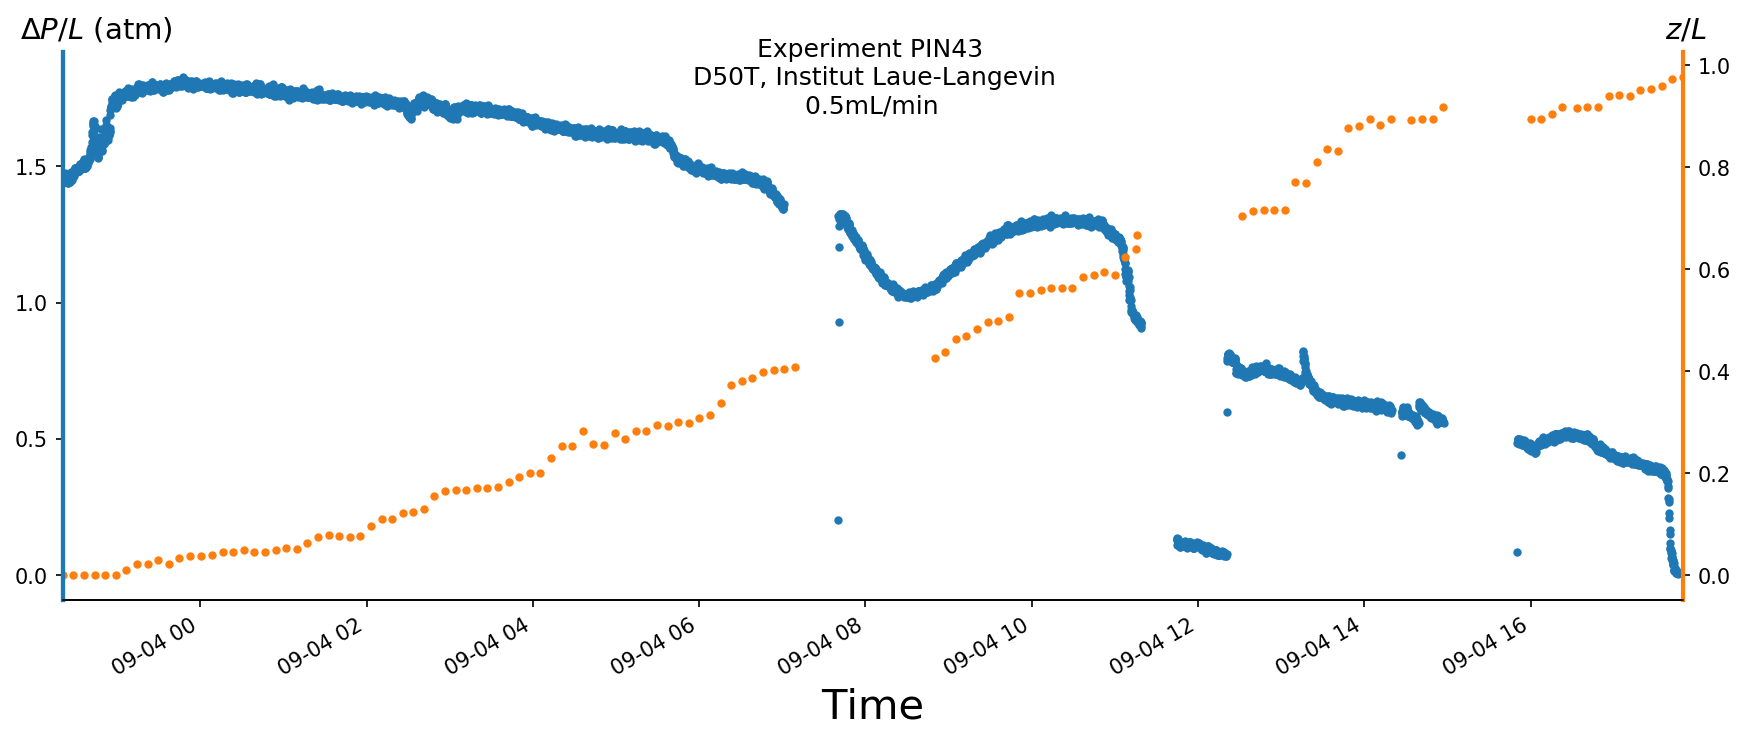

In [302]:
fig= figure(figsize=(12,5), dpi=150)
ax0 = fig.add_axes([0.05,0.17,0.9,0.73])

pressure = dPClean['SN:702643 (S30X):CH0 bar']
pressure = pressure-pressure[-1]
pressure[pressure>0].plot(ax=ax0, style=".", lw=2)

tdf = pandas.read_excel("WormholeGrowth/PIN43_TipPos.xlsx")
tdf["EndTime"] = pandas.to_datetime(tdf["EndTime"])
tdf = tdf.set_index('EndTime')
tdf.Z_max[:6]=tdf.Z_max[:6]+28
Lds = 705.-28
tdf.Z_max-=28

ax0.set_xlabel("Time", fontsize=20)
ax1 = ax0.twinx()
(tdf.Z_max/Lds).plot(ax=ax1, style=".", color="tab:orange")

ax0.set_yticks([0,0.5,1,1.5])

ax0.spines["top"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax0.spines['left'].set_color('#1f77b4')
ax0.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#1f77b4')
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_color('#ff7f0e')
ax1.spines['right'].set_linewidth(2)

fig.text(0.026,0.92, r"$\Delta P/L$ (atm)", fontsize=14)
fig.text(0.94, 0.92, r"$z/L$", fontsize=14)

fig.text(0.4,0.82, "        Experiment PIN43\nD50T, Institut Laue-Langevin\n              0.5mL/min", fontsize=12)

savefig("WormholeGrowth/PIN43_dP.pdf")
show()

In [307]:
print("Core Length: {}mm".format(43.5*(1406-56)/1e3))

Core Length: 58.725mm


/Users/maxc/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


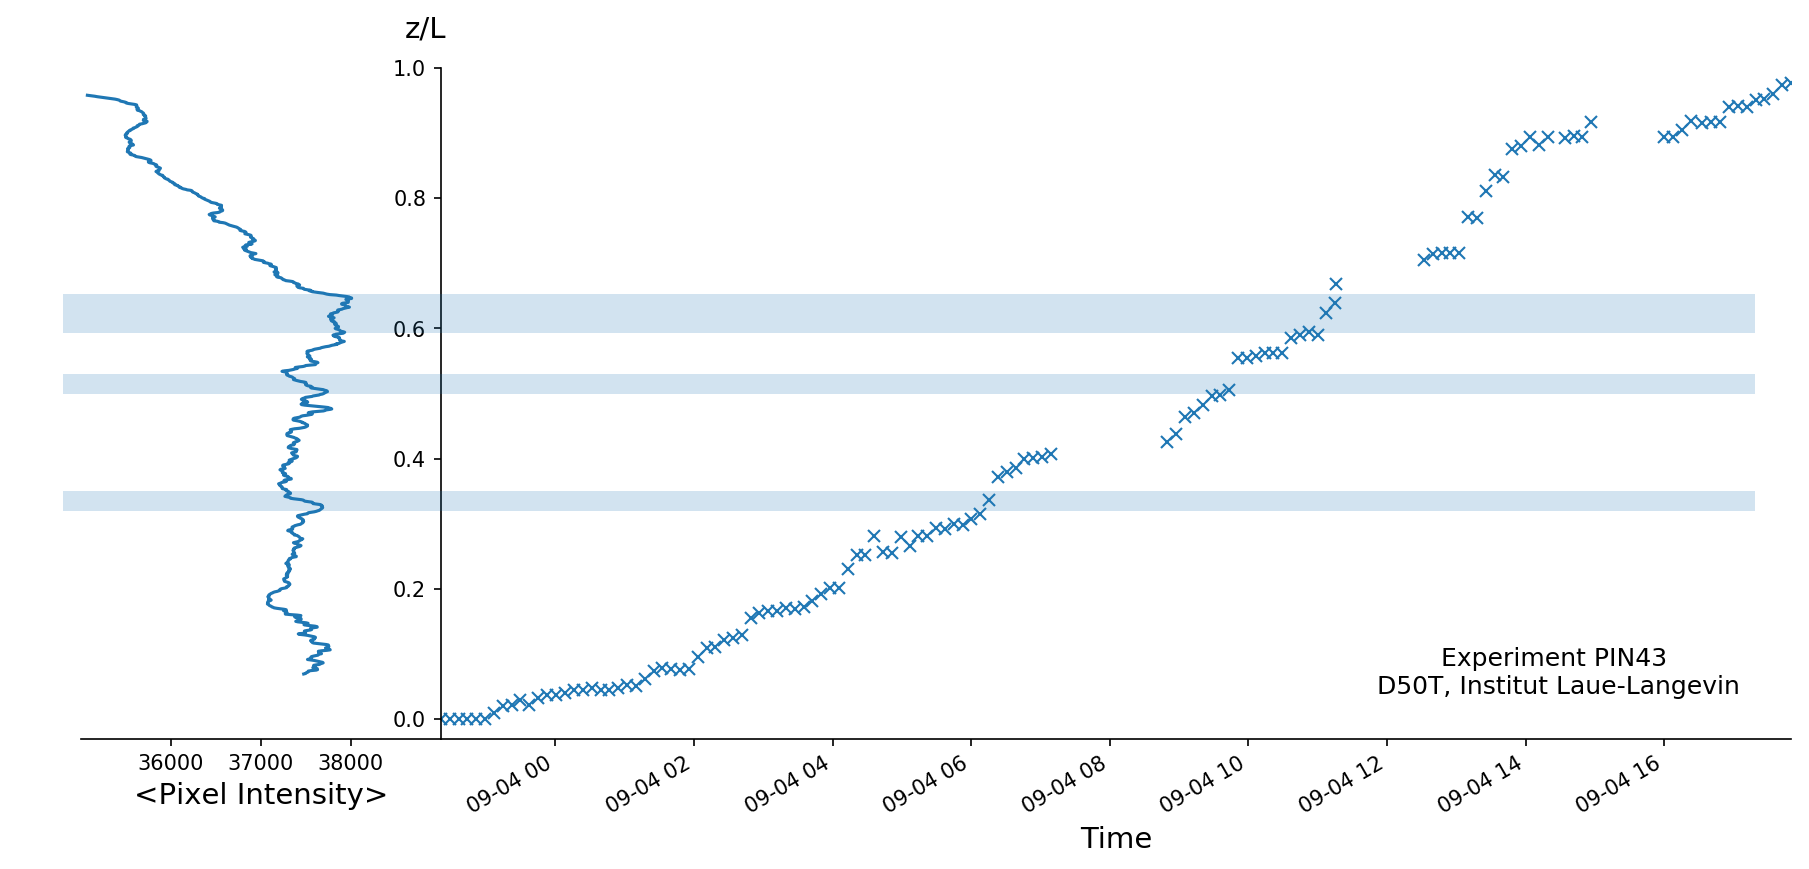

In [216]:
fig= figure(figsize=(12,6), dpi=150)

ax1 = fig.add_axes([0.02, 0.15,0.2,0.8])
psgs = fromfile("WormholeGrowth/whole_PIN43_CM_pss_avg.dat", float64, sep=",")
# Core appears slice 56 (1-index), ends 1406, voxel size 43.5 micrometers
L = 1406-56.
zL = (arange(psgs[150:1350].size)+150-56)/L
ax1.plot(psgs[150:1350],zL)

ax2 = fig.add_axes([0.22,0.15,0.75,0.8])
tdf = pandas.read_excel("WormholeGrowth/PIN43_TipPos.xlsx")
tdf["EndTime"] = pandas.to_datetime(tdf["EndTime"])
tdf = tdf.set_index('EndTime')
# Downscale starts ~28, ends ~705
tdf.Z_max[:6]=tdf.Z_max[:6]+28
Lds = 705.-28
((tdf.Z_max-28)/(Lds)).plot(ax=ax2, style="x")#, lw=2)
#((tdf.Z_manual)/690.).plot(ax=ax2, style='.')

hax = fig.add_axes([0.01,0.15,0.94,0.8])
hax.set_ylim([-0.03, 1.075])
hax.patch.set_visible(None)
hax.axis("off")
rect = Rectangle((0,0.593), 1, 0.06, alpha=0.2) 
hax.add_patch(rect)
rect = Rectangle((0,0.5), 1, 0.03, alpha=0.2) 
hax.add_patch(rect)
rect = Rectangle((0,0.32), 1, 0.03, alpha=0.2) 
hax.add_patch(rect)

ax1.set_ylim([-0.03,1.075])
ax2.set_ylim([-0.03,1.075])
ax1.set_xticks([36000,37000,38000])
ax1.set_xlim([35000,39000])
ax1.set_xlabel("<Pixel Intensity>", fontsize=14)
ax2.set_xlabel("Time", fontsize=14)
ax1.spines["left"].set_visible(None)
ax1.spines["top"].set_visible(None)
ax1.spines["right"].set_visible(None)
ax2.spines["top"].set_visible(None)
ax2.spines["right"].set_visible(None)
ax1.set_yticks([])
ax2.spines["left"].set_bounds(-0.03, 1)
fig.text(0.20, 0.93, "z/L", fontsize=14)

fig.text(0.74,0.2, "        Experiment PIN43\nD50T, Institut Laue-Langevin", fontsize=12)

savefig("WormholeGrowth/PIN43_tipprogress_pss.pdf")
show()

2550.0


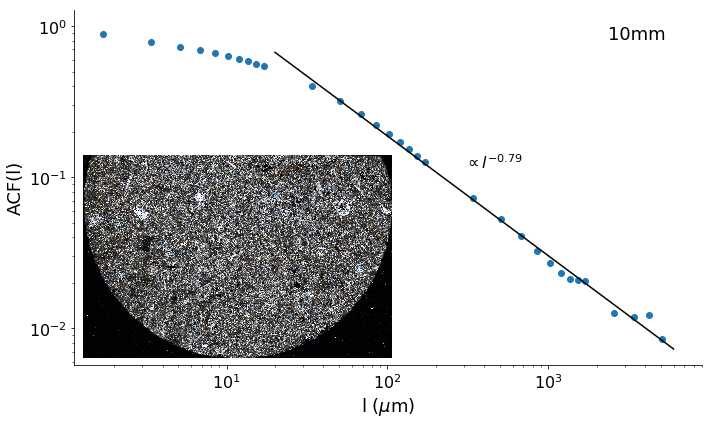

2.2077128346940675


In [403]:
e = loadtxt("WormholeGrowth/10new_correlation_data/e01.dat", delimiter=",")

c_e = loadtxt("WormholeGrowth/10new_correlation_data/c_e01.dat", delimiter=",")
e = e*1.7

fig = figure(figsize=(10,6))
loglog(e, c_e, '.', markersize=12)

sl, itc, _, _, _ = linregress(log(e[11:]), log(c_e[11:]))
x_mod = logspace(log10(20),log10(6e3))
plot(x_mod, exp(itc)*x_mod**sl, color="k", lw=1.5)

xlabel("l ($\mu$m)", fontsize=18)
ylabel("ACF(l)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.85,0.9, "10mm", fontsize=18)
fig.text(0.65, 0.6, r"$\propto l^{-0.79}$", fontsize=16)
tight_layout()

i10 = imageio.imread("WormholeGrowth/PZ101_10mm_ds.tif")
iax = fig.add_axes([0.12,0.005, (6/10.)*1.100*.65, (10/6.)*.721*.65])
iax.imshow(i10)
iax.axis("off")

savefig("WormholeGrowth/corr_plots/10mm.pdf")
show()
print(3+sl)

2.373654059737381
340.0
2.51519200369897


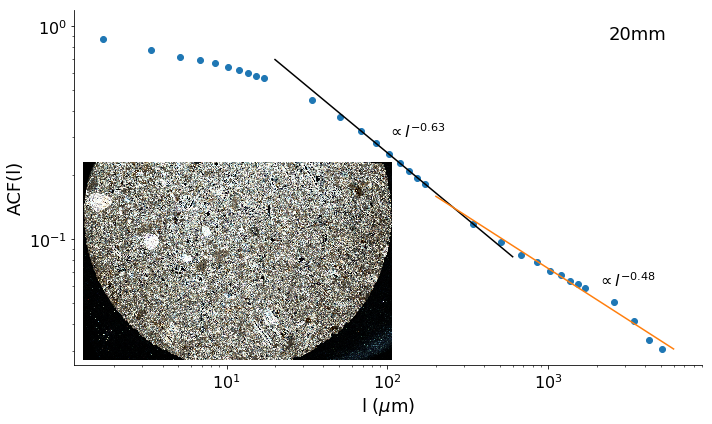

510.0


In [400]:
e = loadtxt("WormholeGrowth/20new_correlation_data/e01.dat", delimiter=",")

c_e = loadtxt("WormholeGrowth/20new_correlation_data/c_e01.dat", delimiter=",")
e = e*1.7

fig = figure(figsize=(10,6))
loglog(e, c_e, '.', markersize=12)

sl, itc, _, _, _ = linregress(log(e[13:21]), log(c_e[13:21]))
print(3+sl)
x_mod = logspace(log10(20),log10(6e2))
plot(x_mod, exp(itc)*x_mod**sl, color="k", lw=1.5)

sl, itc, _, _, _ = linregress(log(e[21:]), log(c_e[21:]))
print(3+sl)
x_mod = logspace(log10(2e2),log10(6e3))
plot(x_mod, exp(itc)*x_mod**sl, color="tab:orange", lw=1.5)

xlabel("l ($\mu$m)", fontsize=18)
ylabel("ACF(l)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.85,0.9, "20mm", fontsize=18)
ax.text(100, 0.3, r"$\propto l^{-0.63}$", fontsize=16)
ax.text(2000, 0.06, r"$\propto l^{-0.48}$", fontsize=16)
tight_layout()

i20 = imageio.imread("WormholeGrowth/PZ101_20mm_ds.tif")
iax = fig.add_axes([0.12,0.005, (6/10.)*1.1*.65, (10/6.)*.703*.65])
iax.imshow(i20)
iax.axis("off")

savefig("WormholeGrowth/corr_plots/20mm.pdf")
show()

2.134640627724576


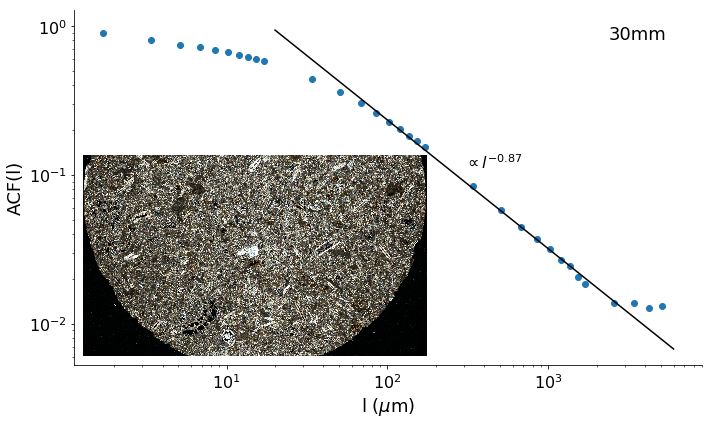

1530.0


In [395]:
e = loadtxt("WormholeGrowth/30new_correlation_data/e01.dat", delimiter=",")

c_e = loadtxt("WormholeGrowth/30new_correlation_data/c_e01.dat", delimiter=",")
e = e*1.7

fig = figure(figsize=(10,6))
loglog(e, c_e, '.', markersize=12)

sl, itc, _, _, _ = linregress(log(e[13:-5]), log(c_e[13:-5]))
print(3+sl)
x_mod = logspace(log10(20),log10(6e3))
plot(x_mod, exp(itc)*x_mod**sl, color="k", lw=1.5)

#sl, itc, _, _, _ = linregress(log(e[21:-4]), log(c_e[21:-4]))
#print(sl)
#x_mod = logspace(log10(2e2),log10(6e3))
#plot(x_mod, exp(itc)*x_mod**sl, color="tab:orange", lw=1.5)

xlabel("l ($\mu$m)", fontsize=18)
ylabel("ACF(l)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.85,0.9, "30mm", fontsize=18)
fig.text(0.65, 0.6, r"$\propto l^{-0.87}$", fontsize=16)
tight_layout()

i30 = imageio.imread("WormholeGrowth/PZ101_30mm_ds.tif")
iax = fig.add_axes([0.12,0.01, (6/10.)*1.136*.7, (10/6.)*.665*.7])
iax.imshow(i30)
iax.axis("off")

savefig("WormholeGrowth/corr_plots/30mm.pdf")
show()

2.4069238449754486
2.6516662851401134


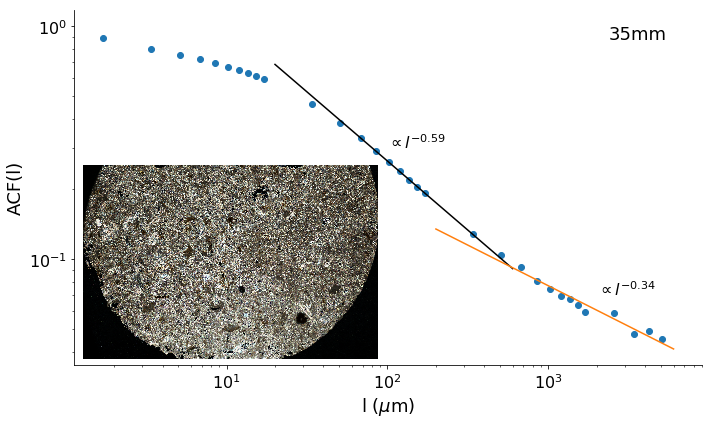

510.0


In [390]:
e = loadtxt("WormholeGrowth/35new_correlation_data/e01.dat", delimiter=",")

c_e = loadtxt("WormholeGrowth/35new_correlation_data/c_e01.dat", delimiter=",")
e = e*1.7

fig = figure(figsize=(10,6))
loglog(e, c_e, '.', markersize=12)

sl, itc, _, _, _ = linregress(log(e[13:21]), log(c_e[13:21]))
print(3+sl)
x_mod = logspace(log10(20),log10(6e2))
plot(x_mod, exp(itc)*x_mod**sl, color="k", lw=1.5)

sl, itc, _, _, _ = linregress(log(e[21:]), log(c_e[21:]))
print(3+sl)
x_mod = logspace(log10(2e2),log10(6e3))
plot(x_mod, exp(itc)*x_mod**sl, color="tab:orange", lw=1.5)

xlabel("l ($\mu$m)", fontsize=18)
ylabel("ACF(l)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.85,0.9, "35mm", fontsize=18)
ax.text(100, 0.3, r"$\propto l^{-0.59}$", fontsize=16)
ax.text(2000, 0.07, r"$\propto l^{-0.34}$", fontsize=16)
tight_layout()

i35 = imageio.imread("WormholeGrowth/PZ101_35mm_ds.tif")
iax = fig.add_axes([0.12,0.01, (6/10.)*1.136*.6, (10/6.)*.748*.6])
iax.imshow(i35)
iax.axis("off")

savefig("WormholeGrowth/corr_plots/35mm.pdf")
show()

2.4584842272505103
2.7784126804845863


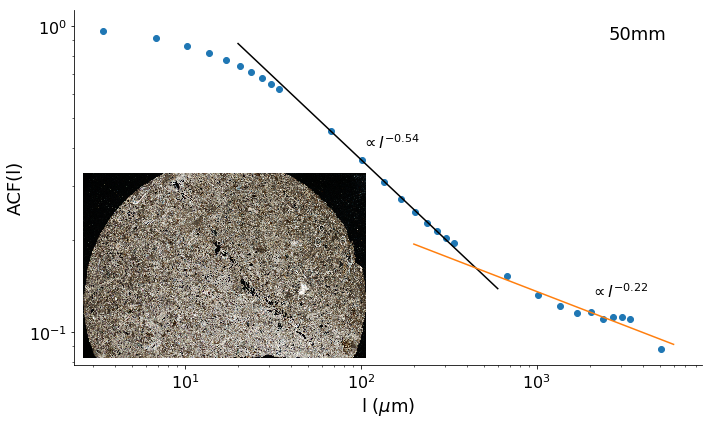

5100.0


In [383]:
e = loadtxt("WormholeGrowth/50_correlation_data/e01.dat", delimiter=",")

c_e = loadtxt("WormholeGrowth/50_correlation_data/c_e01.dat", delimiter=",")
e = e*1.7*2

fig = figure(figsize=(10,6))
loglog(e[:-3], c_e[:-3], '.', markersize=12)

sl, itc, _, _, _ = linregress(log(e[11:19]), log(c_e[11:19]))
print(3+sl)
x_mod = logspace(log10(20),log10(6e2))
plot(x_mod, exp(itc)*x_mod**sl, color="k", lw=1.5)

sl, itc, _, _, _ = linregress(log(e[20:-3]), log(c_e[20:-3]))
print(3+sl)
x_mod = logspace(log10(2e2),log10(6e3))
plot(x_mod, exp(itc)*x_mod**sl, color="tab:orange", lw=1.5)

xlabel("l ($\mu$m)", fontsize=18)
ylabel("ACF(l)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.85,0.9, "50mm", fontsize=18)
ax.text(100, 0.4, r"$\propto l^{-0.54}$", fontsize=16)
ax.text(2000, 0.13, r"$\propto l^{-0.22}$", fontsize=16)
tight_layout()
#plot(e[11:18], c_e[11:18])

i50 = imageio.imread("WormholeGrowth/PZ101_50mm_ds.tif")
iax = fig.add_axes([0.12,0.02, (6/10.)*1.136*.575, (10/6.)*.742*.575])
iax.imshow(i50)
iax.axis("off")

savefig("WormholeGrowth/corr_plots/50mm.pdf")
show()

2.1202338924814317


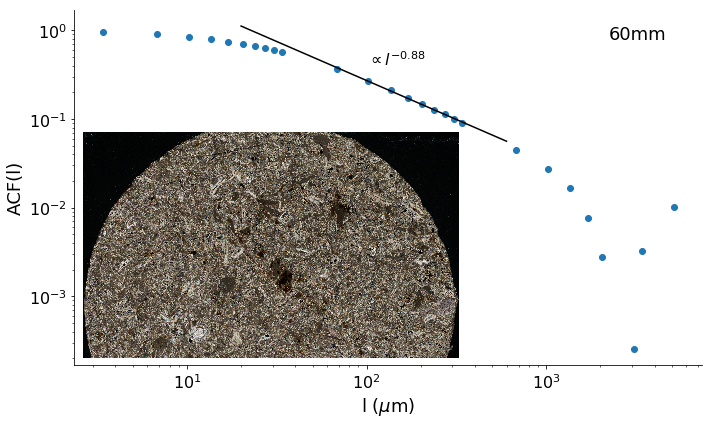

(68.0, 340.0)


In [369]:
e = loadtxt("WormholeGrowth/60_correlation_data/e01.dat", delimiter=",")

c_e = loadtxt("WormholeGrowth/60_correlation_data/c_e01.dat", delimiter=",")
e = e*1.7*2

fig = figure(figsize=(10,6))
loglog(e[:-3], c_e[:-3], '.', markersize=12)

sl, itc, _, _, _ = linregress(log(e[11:20]), log(c_e[11:20]))
print(3+sl)
x_mod = logspace(log10(20),log10(6e2))
plot(x_mod, exp(itc)*x_mod**sl, color="k", lw=1.5)

#sl, itc, _, _, _ = linregress(log(e[20:-3]), log(c_e[20:-3]))
#print(sl)
#x_mod = logspace(log10(2e2),log10(6e3))
#plot(x_mod, exp(itc)*x_mod**sl, color="tab:orange", lw=1.5)

xlabel("l ($\mu$m)", fontsize=18)
ylabel("ACF(l)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.85,0.9, "60mm", fontsize=18)
ax.text(100, 0.4, r"$\propto l^{-0.88}$", fontsize=16)
#ax.text(2000, 0.13, r"$\propto l^{-0.22}$", fontsize=16)
tight_layout()
#plot(e[11:20], c_e[11:20])

i60 = imageio.imread("WormholeGrowth/PZ101_60mm_ds.tif")
iax = fig.add_axes([0.12,0.055, (6/10.)*1.160*.75, (10/6.)*.588*.75])
iax.imshow(i60)
iax.axis("off")

savefig("WormholeGrowth/corr_plots/60mm.pdf")
show()

2.1521741796894833
2.3940769612673174


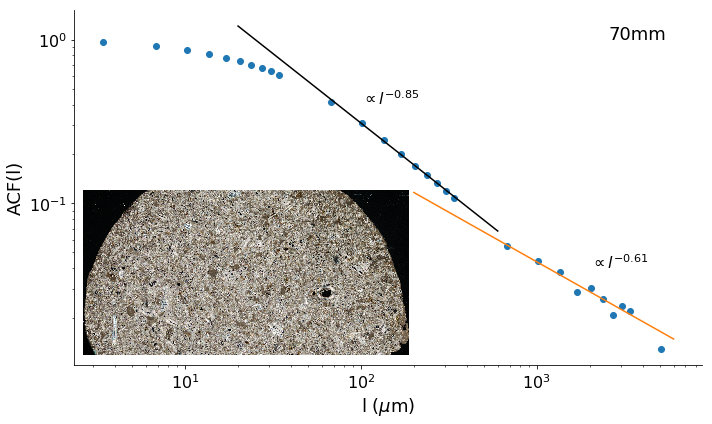

(68.0, 340.0, 680.0, 3400.0)


In [362]:
e = loadtxt("WormholeGrowth/70_correlation_data/e01.dat", delimiter=",")

c_e = loadtxt("WormholeGrowth/70_correlation_data/c_e01.dat", delimiter=",")
e = e*1.7*2

fig = figure(figsize=(10,6))
loglog(e[:-3], c_e[:-3], '.', markersize=12)

sl, itc, _, _, _ = linregress(log(e[11:20]), log(c_e[11:20]))
print(3+sl)
x_mod = logspace(log10(20),log10(6e2))
plot(x_mod, exp(itc)*x_mod**sl, color="k", lw=1.5)

sl, itc, _, _, _ = linregress(log(e[20:-4]), log(c_e[20:-4]))
print(3+sl)
x_mod = logspace(log10(2e2),log10(6e3))
plot(x_mod, exp(itc)*x_mod**sl, color="tab:orange", lw=1.5)

xlabel("l ($\mu$m)", fontsize=18)
ylabel("ACF(l)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.85,0.9, "70mm", fontsize=18)
ax.text(100, 0.4, r"$\propto l^{-0.85}$", fontsize=16)
ax.text(2000, 0.04, r"$\propto l^{-0.61}$", fontsize=16)
tight_layout()
#plot(e[11:18], c_e[11:18])

i70 = imageio.imread("WormholeGrowth/PZ101_70mm_ds.tif")
iax = fig.add_axes([0.12,0.04, (6/10.)*1.160*.65, (10/6.)*.588*.65])
iax.imshow(i70)
iax.axis("off")

savefig("WormholeGrowth/corr_plots/70mm.pdf")
show()

-0.40740596304966664
68.0


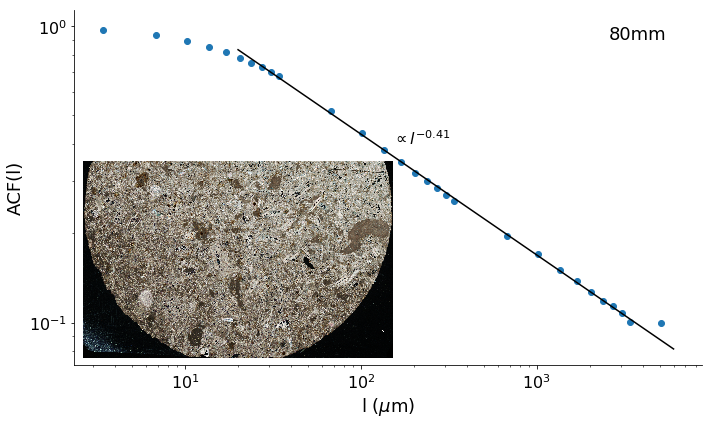

In [342]:
e = loadtxt("WormholeGrowth/80_correlation_data/e01.dat", delimiter=",")

c_e = loadtxt("WormholeGrowth/80_correlation_data/c_e01.dat", delimiter=",")
e = e*1.7*2

fig = figure(figsize=(10,6))
loglog(e[:-3], c_e[:-3], '.', markersize=12)

sl, itc, _, _, _ = linregress(log(e[11:-4]), log(c_e[11:-4]))
print(sl)
x_mod = logspace(log10(20),log10(6e3))
plot(x_mod, exp(itc)*x_mod**sl, color="k", lw=1.5)

#sl, itc, _, _, _ = linregress(log(e[20:-4]), log(c_e[20:-4]))
#print(sl)
#x_mod = logspace(log10(2e2),log10(6e3))
#plot(x_mod, exp(itc)*x_mod**sl, color="tab:orange", lw=1.5)

xlabel("l ($\mu$m)", fontsize=18)
ylabel("ACF(l)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.85,0.9, "80mm", fontsize=18)
ax.text(150, 0.4, r"$\propto l^{-0.41}$", fontsize=16)
tight_layout()

i80 = imageio.imread("WormholeGrowth/PZ101_80mm_ds.tif")
iax = fig.add_axes([0.12,0.16, (6/10.)*.954*.75, (10/6)*.610*.75])
iax.imshow(i80)
iax.axis("off")

savefig("WormholeGrowth/corr_plots/80mm.pdf")
show()

In [9]:
mean([-0.79,-0.63,-0.87,-0.59,-0.54,-0.88,-0.85])

-0.7357142857142857

In [10]:
mean([-0.48,-0.34,-0.22,-0.61])

-0.4125

-0.8628574237074563
-0.2767637813958478
8700.0


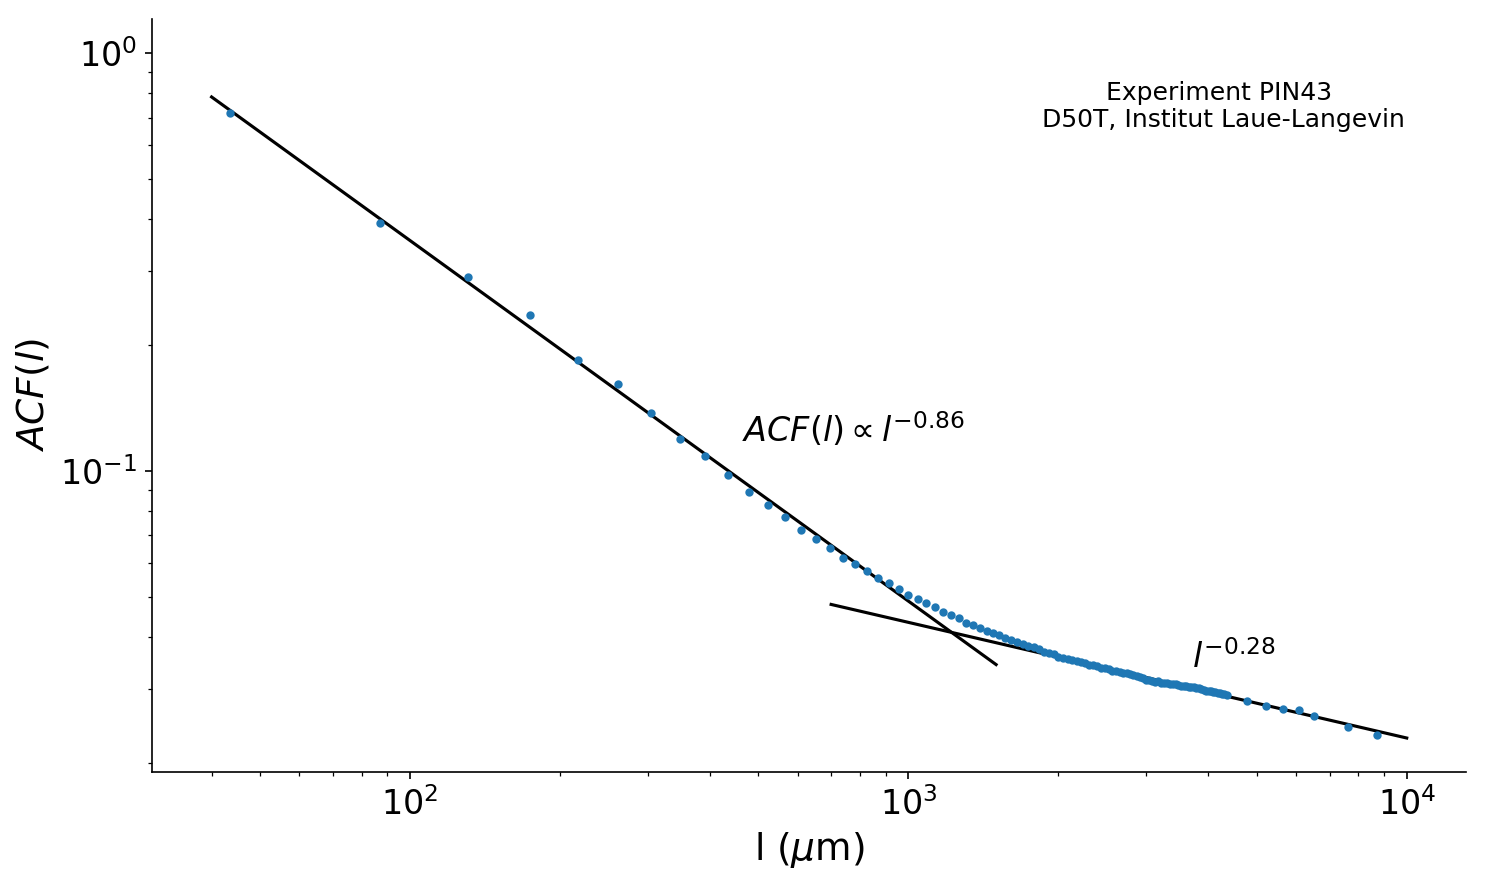

In [309]:
e = loadtxt("WormholeGrowth/PIN43_whole_correlation_data/e01.dat", delimiter=",")
e = append(e, loadtxt("WormholeGrowth/PIN43_whole_correlation_data/e02.dat", delimiter=","))
e = append(e, loadtxt("WormholeGrowth/PIN43_whole_correlation_data/e03.dat", delimiter=","))
c_e = loadtxt("WormholeGrowth/PIN43_whole_correlation_data/c_e01.dat", delimiter=",")
c_e = append(c_e, loadtxt("WormholeGrowth/PIN43_whole_correlation_data/c_e02.dat", delimiter=","))
c_e = append(c_e, loadtxt("WormholeGrowth/PIN43_whole_correlation_data/c_e03.dat", delimiter=","))
e = e*43.5
data = {'e':e, 'c_e':c_e}
df = pandas.DataFrame(data)
df = df.sort_values('e')

fig = figure(figsize=(10,6), dpi=150)
ax = fig.gca()

sl, ict, _, _, _ = linregress(log(e[1:25]), log(c_e[1:25]))
xmod = logspace(log10(0.4e2), log10(1.5e3)) 
print(sl)
loglog(xmod, exp(ict)*xmod**sl, color="k") # Model to 1mm

sl, ict, _, _, _ = linregress(log(e[45:-9]), log(c_e[45:-9]))
print(sl)
xmod = logspace(log10(0.7e3), log10(1e4))
loglog(xmod, exp(ict)*xmod**sl, color="k") # Model from 1mm

loglog(e[:-9], c_e[:-9], '.')

fig.text(0.5,0.5, r"$ACF(l) \propto l^{-0.86}$", fontsize=16)
fig.text(0.8,0.25, r"$l^{-0.28}$", fontsize=16)

xlabel("l ($\mu$m)", fontsize=18)
ylabel(r"$ACF(l)$", fontsize=18)
fig.text(0.7,0.85, "        Experiment PIN43\nD50T, Institut Laue-Langevin", fontsize=12)
xticks(fontsize=16)
yticks(fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

tight_layout()

savefig("WormholeGrowth/PIN43_Acf.pdf")
show()

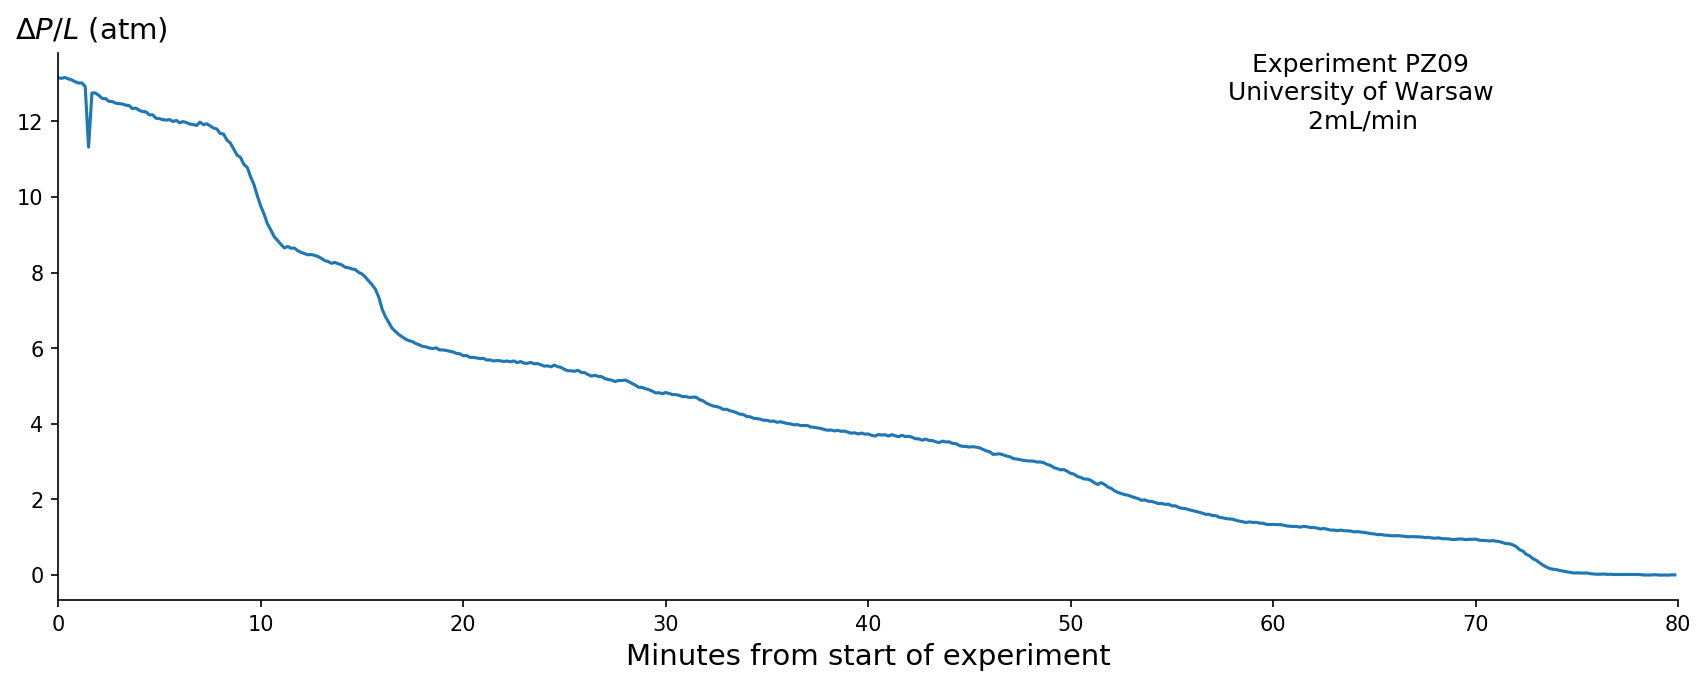

In [299]:
df = pandas.read_excel("WormholeGrowth/PressureLogs/PZ09_AcidPressureLog.xlsx", skiprows=4)
dP = df.iloc[:-1,8:10]
dP['SN:702643 (S30X):CH0 bar'] = pandas.to_numeric(dP['SN:702643 (S30X):CH0 bar'])
pressure = dP['SN:702643 (S30X):CH0 bar'][130:]# Window of core acidization
pressure -= pressure.values[-1]
fig= figure(figsize=(12,5), dpi=150)
ax = fig.add_axes([0.05,0.17,0.9,0.73])
plot(arange(pressure.size)*10/60., pressure.get_values())
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.026,0.92, r"$\Delta P/L$ (atm)", fontsize=14)
ax.set_xlabel("Minutes from start of experiment", fontsize=14)
ax.set_xlim([0,80])

fig.text(0.7,0.8, "   Experiment PZ09\nUniversity of Warsaw\n          2mL/min", fontsize=12)

savefig("WormholeGrowth/PressureLogs/PZ09_PressurePlot.pdf")
show()

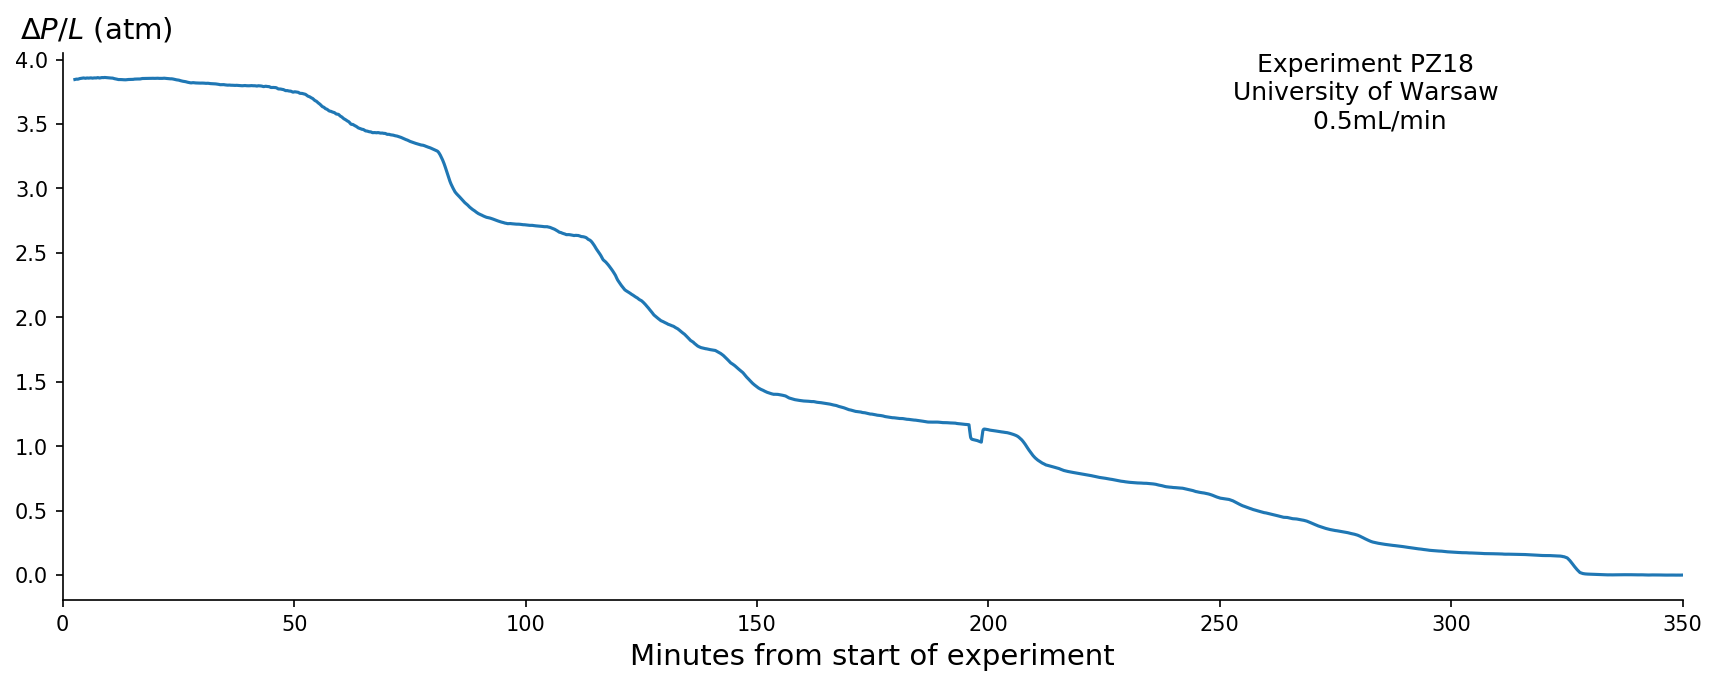

In [300]:
df = pandas.read_excel("WormholeGrowth/PressureLogs/PZ18_PressureLog.xlsx", skiprows=4)
dP = df.iloc[:-1,8:10]
dP['SN:702643 (S30X):CH0 bar'] = pandas.to_numeric(dP['SN:702643 (S30X):CH0 bar'])
pressure = dP['SN:702643 (S30X):CH0 bar'][550:]# Window of core acidization
pressure = pressure.rolling(80).mean()
pressure -= pressure.values[-1]
fig= figure(figsize=(12,5), dpi=150)
ax = fig.add_axes([0.05,0.17,0.9,0.73])
plot(arange(pressure.size)*2/60., pressure.get_values())
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(0.026,0.92, r"$\Delta P/L$ (atm)", fontsize=14)
ax.set_xlabel("Minutes from start of experiment", fontsize=14)
ax.set_xlim([0,350])

fig.text(0.7,0.8, "   Experiment PZ18\nUniversity of Warsaw\n          0.5mL/min", fontsize=12)

savefig("WormholeGrowth/PressureLogs/PZ18_PressurePlot.pdf")
show()